In [1]:
# nouveau test pour spotify extraction de features pour le genre yodel



import spotipy
import numpy as np
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import time
import random
import requests
import regex
from string import punctuation


#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id='b296764cf30c44deb6b062ef770248d7',
                                                      client_secret='a97bc08fd836451cbff3808a6291e2e0')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [2]:
playlist_link = "https://open.spotify.com/playlist/4mwIpQST2EJgzhMXHiZuUX?si=44ff2781721b46e7"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]


for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    
    #Track name
    track_name = track["track"]["name"]
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    


In [5]:
playlist_URI

'4mwIpQST2EJgzhMXHiZuUX'

In [37]:
playlist_link = "https://open.spotify.com/playlist/4mwIpQST2EJgzhMXHiZuUX?si=44ff2781721b46e7"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]





playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in sp.playlist_tracks(playlist_URI)["items"]:
    
    playlist_tracks_id.append(track['track']['id'])
    
    playlist_tracks_titles.append(track['track']['name'])





features = sp.audio_features(playlist_tracks_id)


features_yodel_df = pd.DataFrame(data=features, columns=features[0].keys())




features_yodel_df['title'] = playlist_tracks_titles


#features_df = features_df.set_index('id')
features_yodel_df = features_yodel_df[['id', 'title',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]


features_yodel_df.drop('duration_ms', axis =1, inplace=True)
features_yodel_df.drop('time_signature', axis=1, inplace=True)
features_yodel_df.drop('id', axis =1, inplace=True)
features_yodel_df.drop('title', axis =1, inplace=True)
features_yodel_df.drop('key', axis =1, inplace=True)
features_yodel_df.drop('mode', axis =1, inplace=True)

features_yodel_df['Genre'] = 'yodel'

In [64]:
df_data = pd.read_csv('spotify_clean.csv')



df_data_all = pd.concat([features_yodel_df, df_data], join='inner')

In [65]:
df_data_all

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,Genre
0,0.725,0.348,-7.618,0.8590,0.000001,0.1790,0.963,130.056,yodel
1,0.352,0.263,-8.854,0.9500,0.000000,0.1060,0.439,105.263,yodel
2,0.468,0.279,-11.155,0.9140,0.000000,0.0774,0.962,199.887,yodel
3,0.411,0.589,-7.305,0.9770,0.000733,0.1030,0.784,105.912,yodel
4,0.851,0.302,-9.624,0.9080,0.031300,0.0714,0.896,127.763,yodel
...,...,...,...,...,...,...,...,...,...
486,0.684,0.176,-18.217,0.9920,0.011300,0.1740,0.644,109.723,Blues
487,0.452,0.260,-18.027,0.9940,0.016200,0.3030,0.615,131.759,Blues
488,0.869,0.672,-5.660,0.1840,0.000000,0.0760,0.813,120.954,Blues
489,0.869,0.672,-5.660,0.1840,0.000000,0.0760,0.813,120.954,Jazz


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

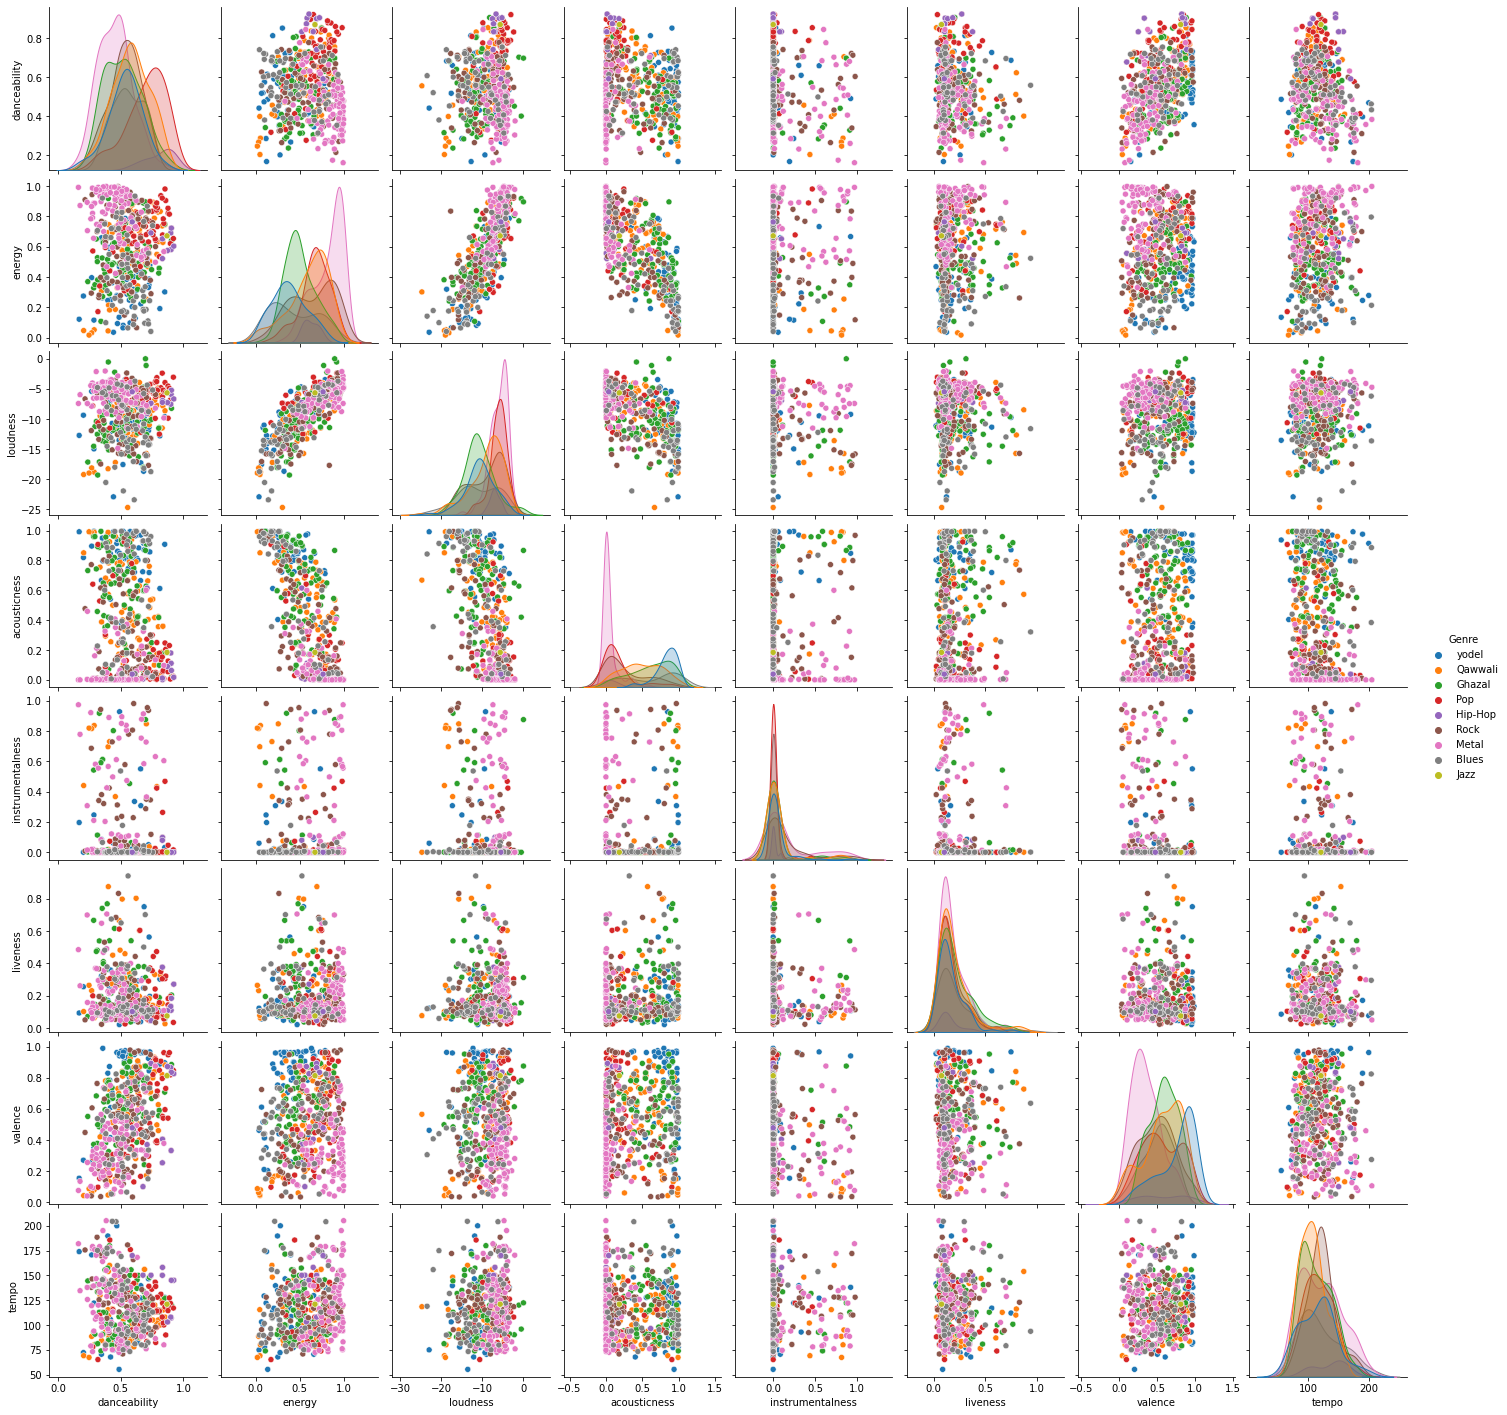

In [67]:
# Importing required libraries
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


pairplot(df_data_all, hue='Genre')

In [69]:
df=df_data_all

X = df.drop('Genre',axis=1)
y = df['Genre']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

cols = X_train.columns

from sklearn.svm import SVR







from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [71]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [72]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.4324


In [73]:
# instantiate classifier with rbf kernel and C=10
svc=SVC(C=10) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=10.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=10.0 : 0.4054


In [74]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.4144


In [75]:
# instantiate classifier with linear kernel and C=10.0
lin_svc10=SVC(kernel='linear', C=10.0) 


# fit classifier to training set
lin_svc10.fit(X_train, y_train)


# make predictions on test set
y_pred=lin_svc10.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=10.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=10.0 : 0.3604


In [76]:
# instantiate classifier with polynomial kernel and C=100.0
lin_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
lin_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=lin_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.3784


In [77]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=10.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=10.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=10.0 : 0.4054


In [78]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100 : 0.3694


In [79]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.3784


In [80]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.2973


In [81]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='rbf', C=100) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.4144


In [46]:
#create DataFrames
df1 = pd.DataFrame({'a': [0, 0, 1, 1, 2],
                   'b': [0, 0, 1, 1, 1],
                   'c': [11, 8, 10, 6, 6]})

df2 = pd.DataFrame({'a': [0, 1, 1, 1, 3],
                   'b': [0, 0, 0, 1, 1],
                   'd': [22, 24, 25, 33, 37]})

In [62]:
pd.concat([df1,df2], join='inner')

,a,b
0,0,0
1,0,0
2,1,1
3,1,1
4,2,1
0,0,0
1,1,0
2,1,0
3,1,1
4,3,1


In [ ]:
pairplot(df_test, hue='label')